Bộ dữ liệu có nội dung về sự đánh giá của người dùng đối với các bộ phim. Mỗi người dùng có thể đánh giá nhiều bộ phim và mỗi bộ phim có thể được đánh giá bởi nhiều người dùng.

## Import thư viện

In [1]:
import networkx as nx # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import random
from collections import Counter
from itertools import combinations
import community.community_louvain as community_louvain
import numpy as np

## Load dataset tạo đồ thị

In [2]:
n = 200

ratings = pd.read_csv('./Dataset/Dataset.csv', sep=',', header=0)[:n]
ratings = ratings.dropna()

# Lấy danh sách người dùng và phim
users = ratings['userId'].unique()
movies = ratings['tmdbId'].unique()
print('Number of users:', len(users))
print('Number of movies:', len(movies))
print('Number of ratings:', len(ratings))

# Tạo danh sách cạnh
edges = list(zip(ratings['userId'], ratings['tmdbId']))

# Tạo đồ thị hai phía (users và movies)
B = nx.Graph()

B.add_nodes_from(users, bipartite=0)  # Nhóm người dùng
B.add_nodes_from(movies, bipartite=1)   # Nhóm phim

B.add_edges_from(edges)

Number of users: 70
Number of movies: 112
Number of ratings: 200


## Trực quan hóa đồ thị hai phía

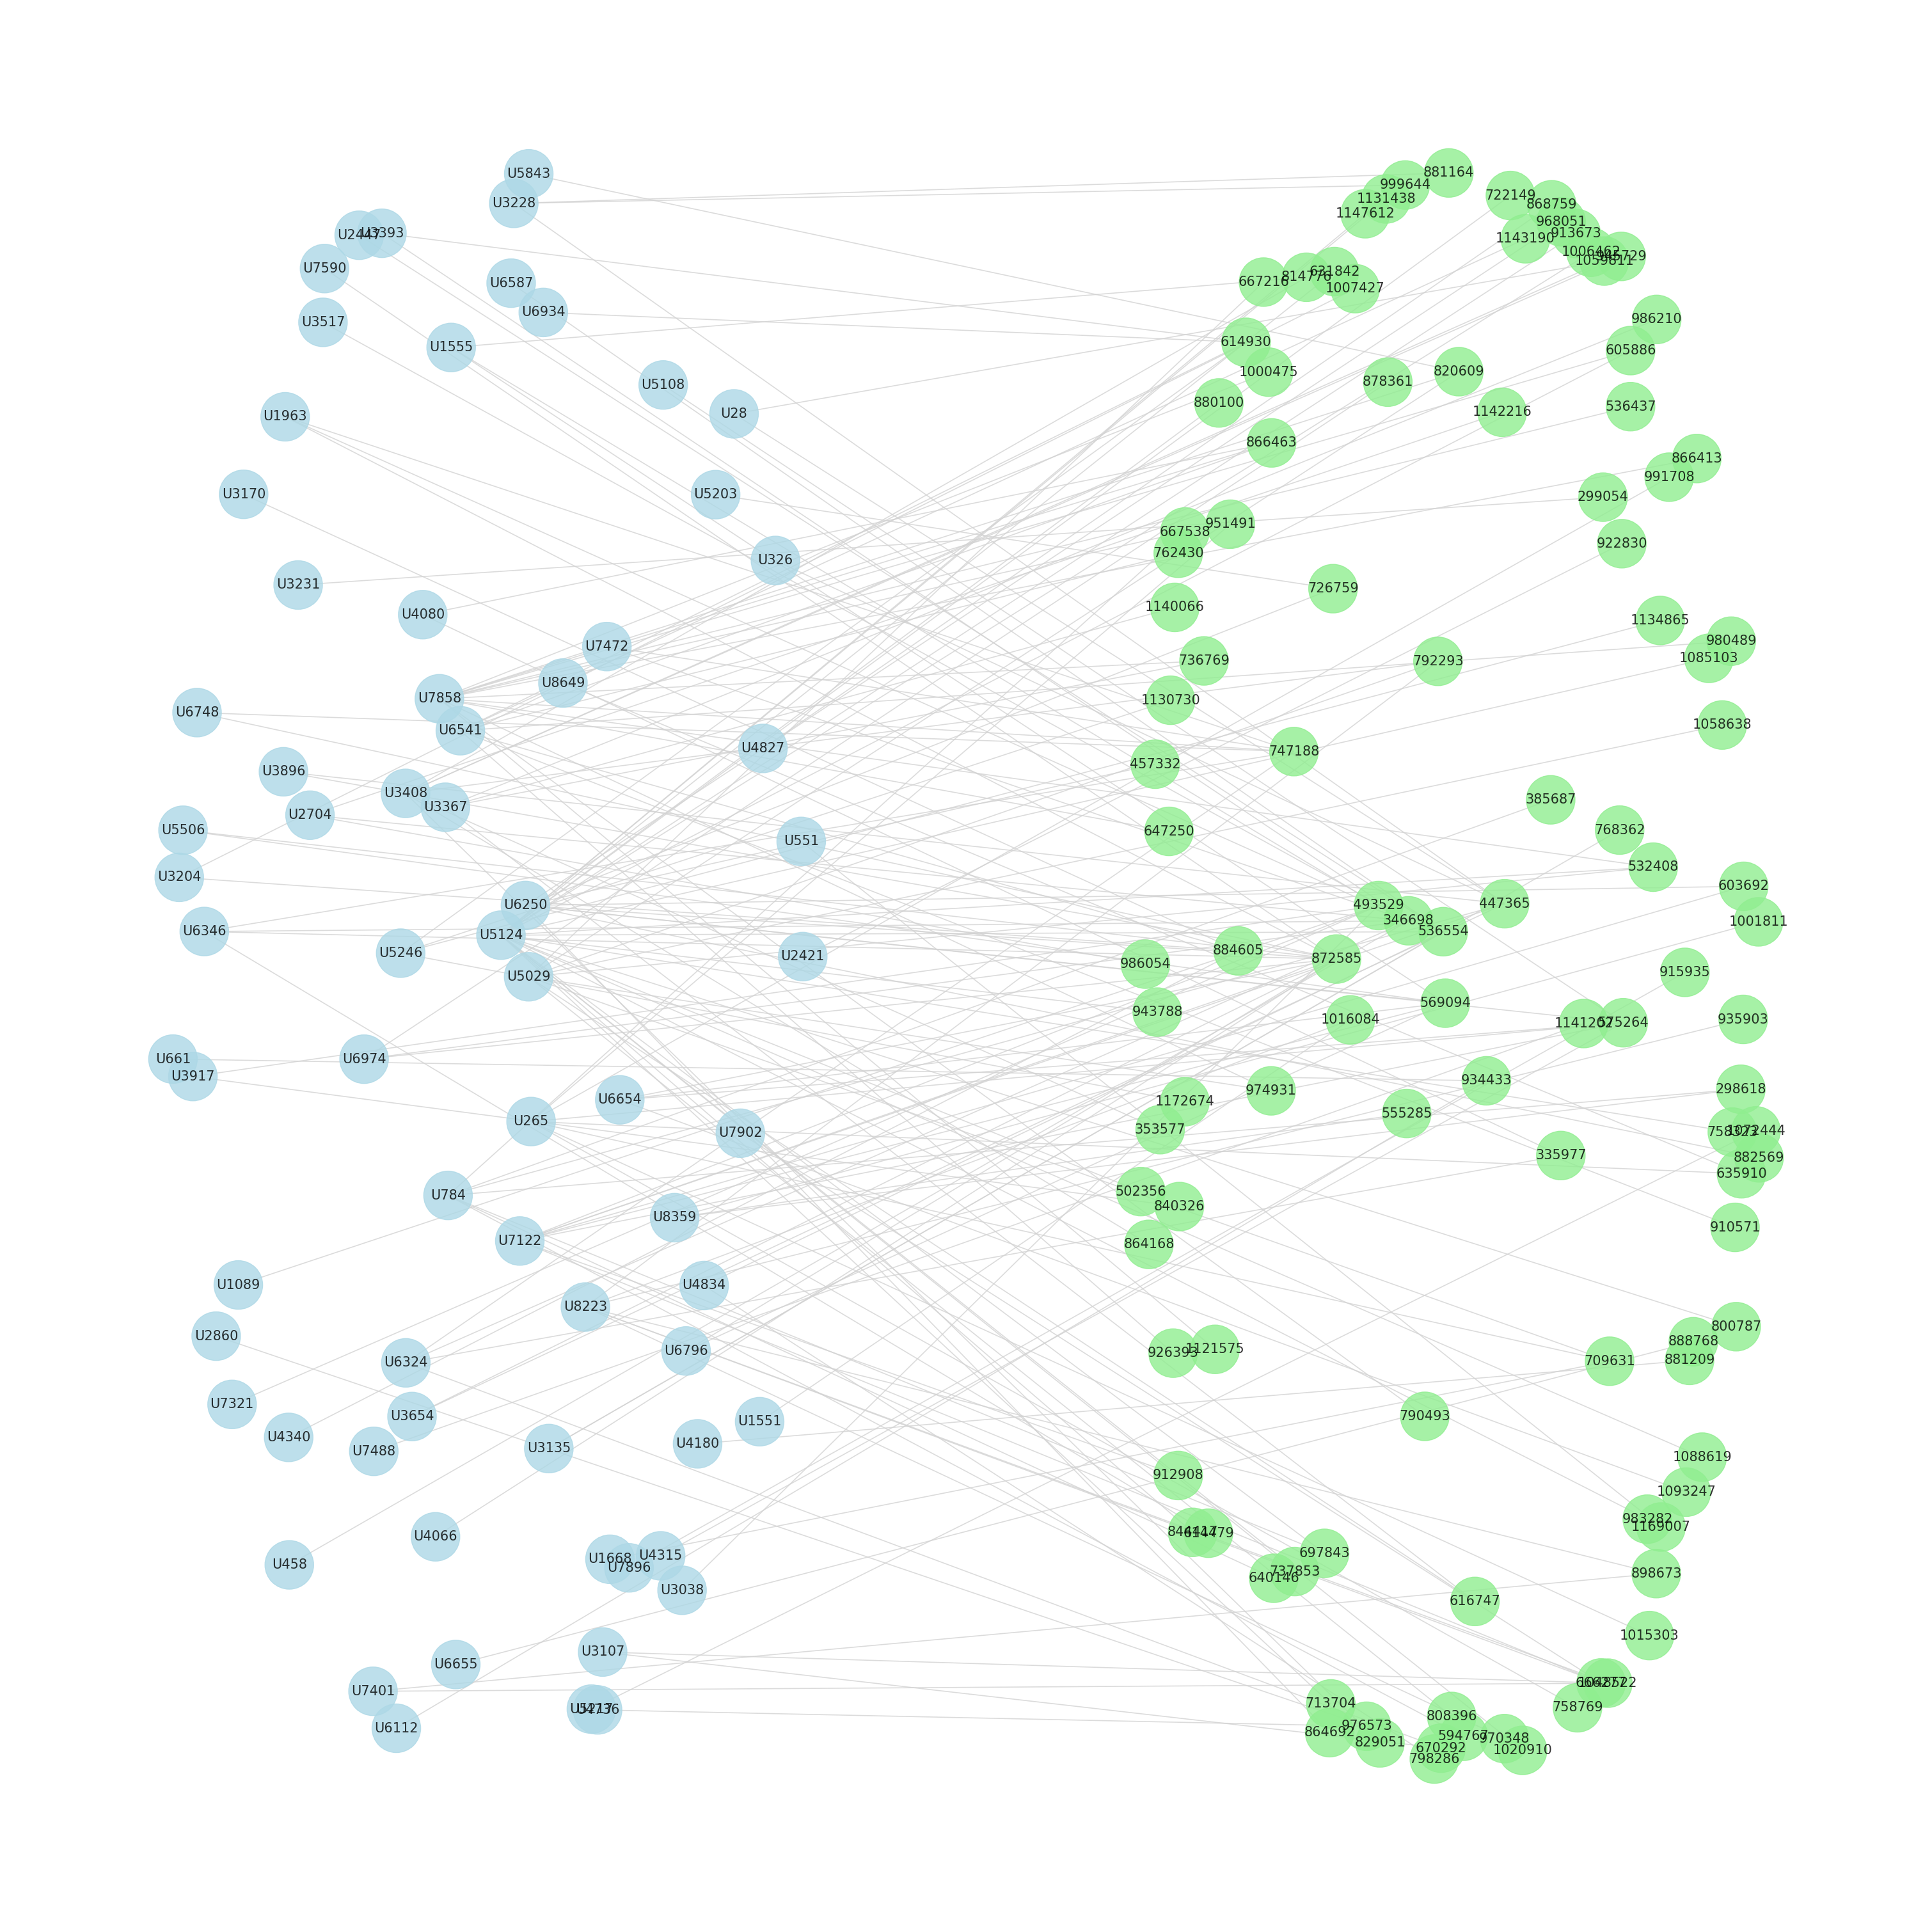

In [3]:
plt.figure(figsize=(30, 30))

# Sử dụng bố cục bipartite_layout
pos = nx.spring_layout(B, k=0.7)

# Tăng khoảng cách giữa các nhóm
for key, value in pos.items():
    if key in users:
        pos[key][0] -= 1.5  # Di chuyển nhóm user sang trái nhiều hơn
    else:
        pos[key][0] += 1.5  # Di chuyển nhóm movie sang phải nhiều hơn

nx.draw(B, pos,
        with_labels=True,
        node_color=['lightblue' if n in users else 'lightgreen' for n in B.nodes()],
        node_size=3000,  # Tăng kích thước nút để dễ nhận diện hơn
        font_size=15,  # Tăng kích thước phông chữ
        edge_color='lightgray',  # Đổi màu cạnh để dễ nhìn hơn
        alpha=0.8,  # Tăng độ trong suốt của cạnh một chút để giảm sự rối mắt
        width=1.2)  # Giảm độ dày cạnh để tránh quá đậm

plt.show()

## Chuyển đồ thị hai phía thành đồ thị một phía

In [4]:
# Tạo đồ thị chiếu người dùng-phim
user_movie = nx.bipartite.weighted_projected_graph(B, users)

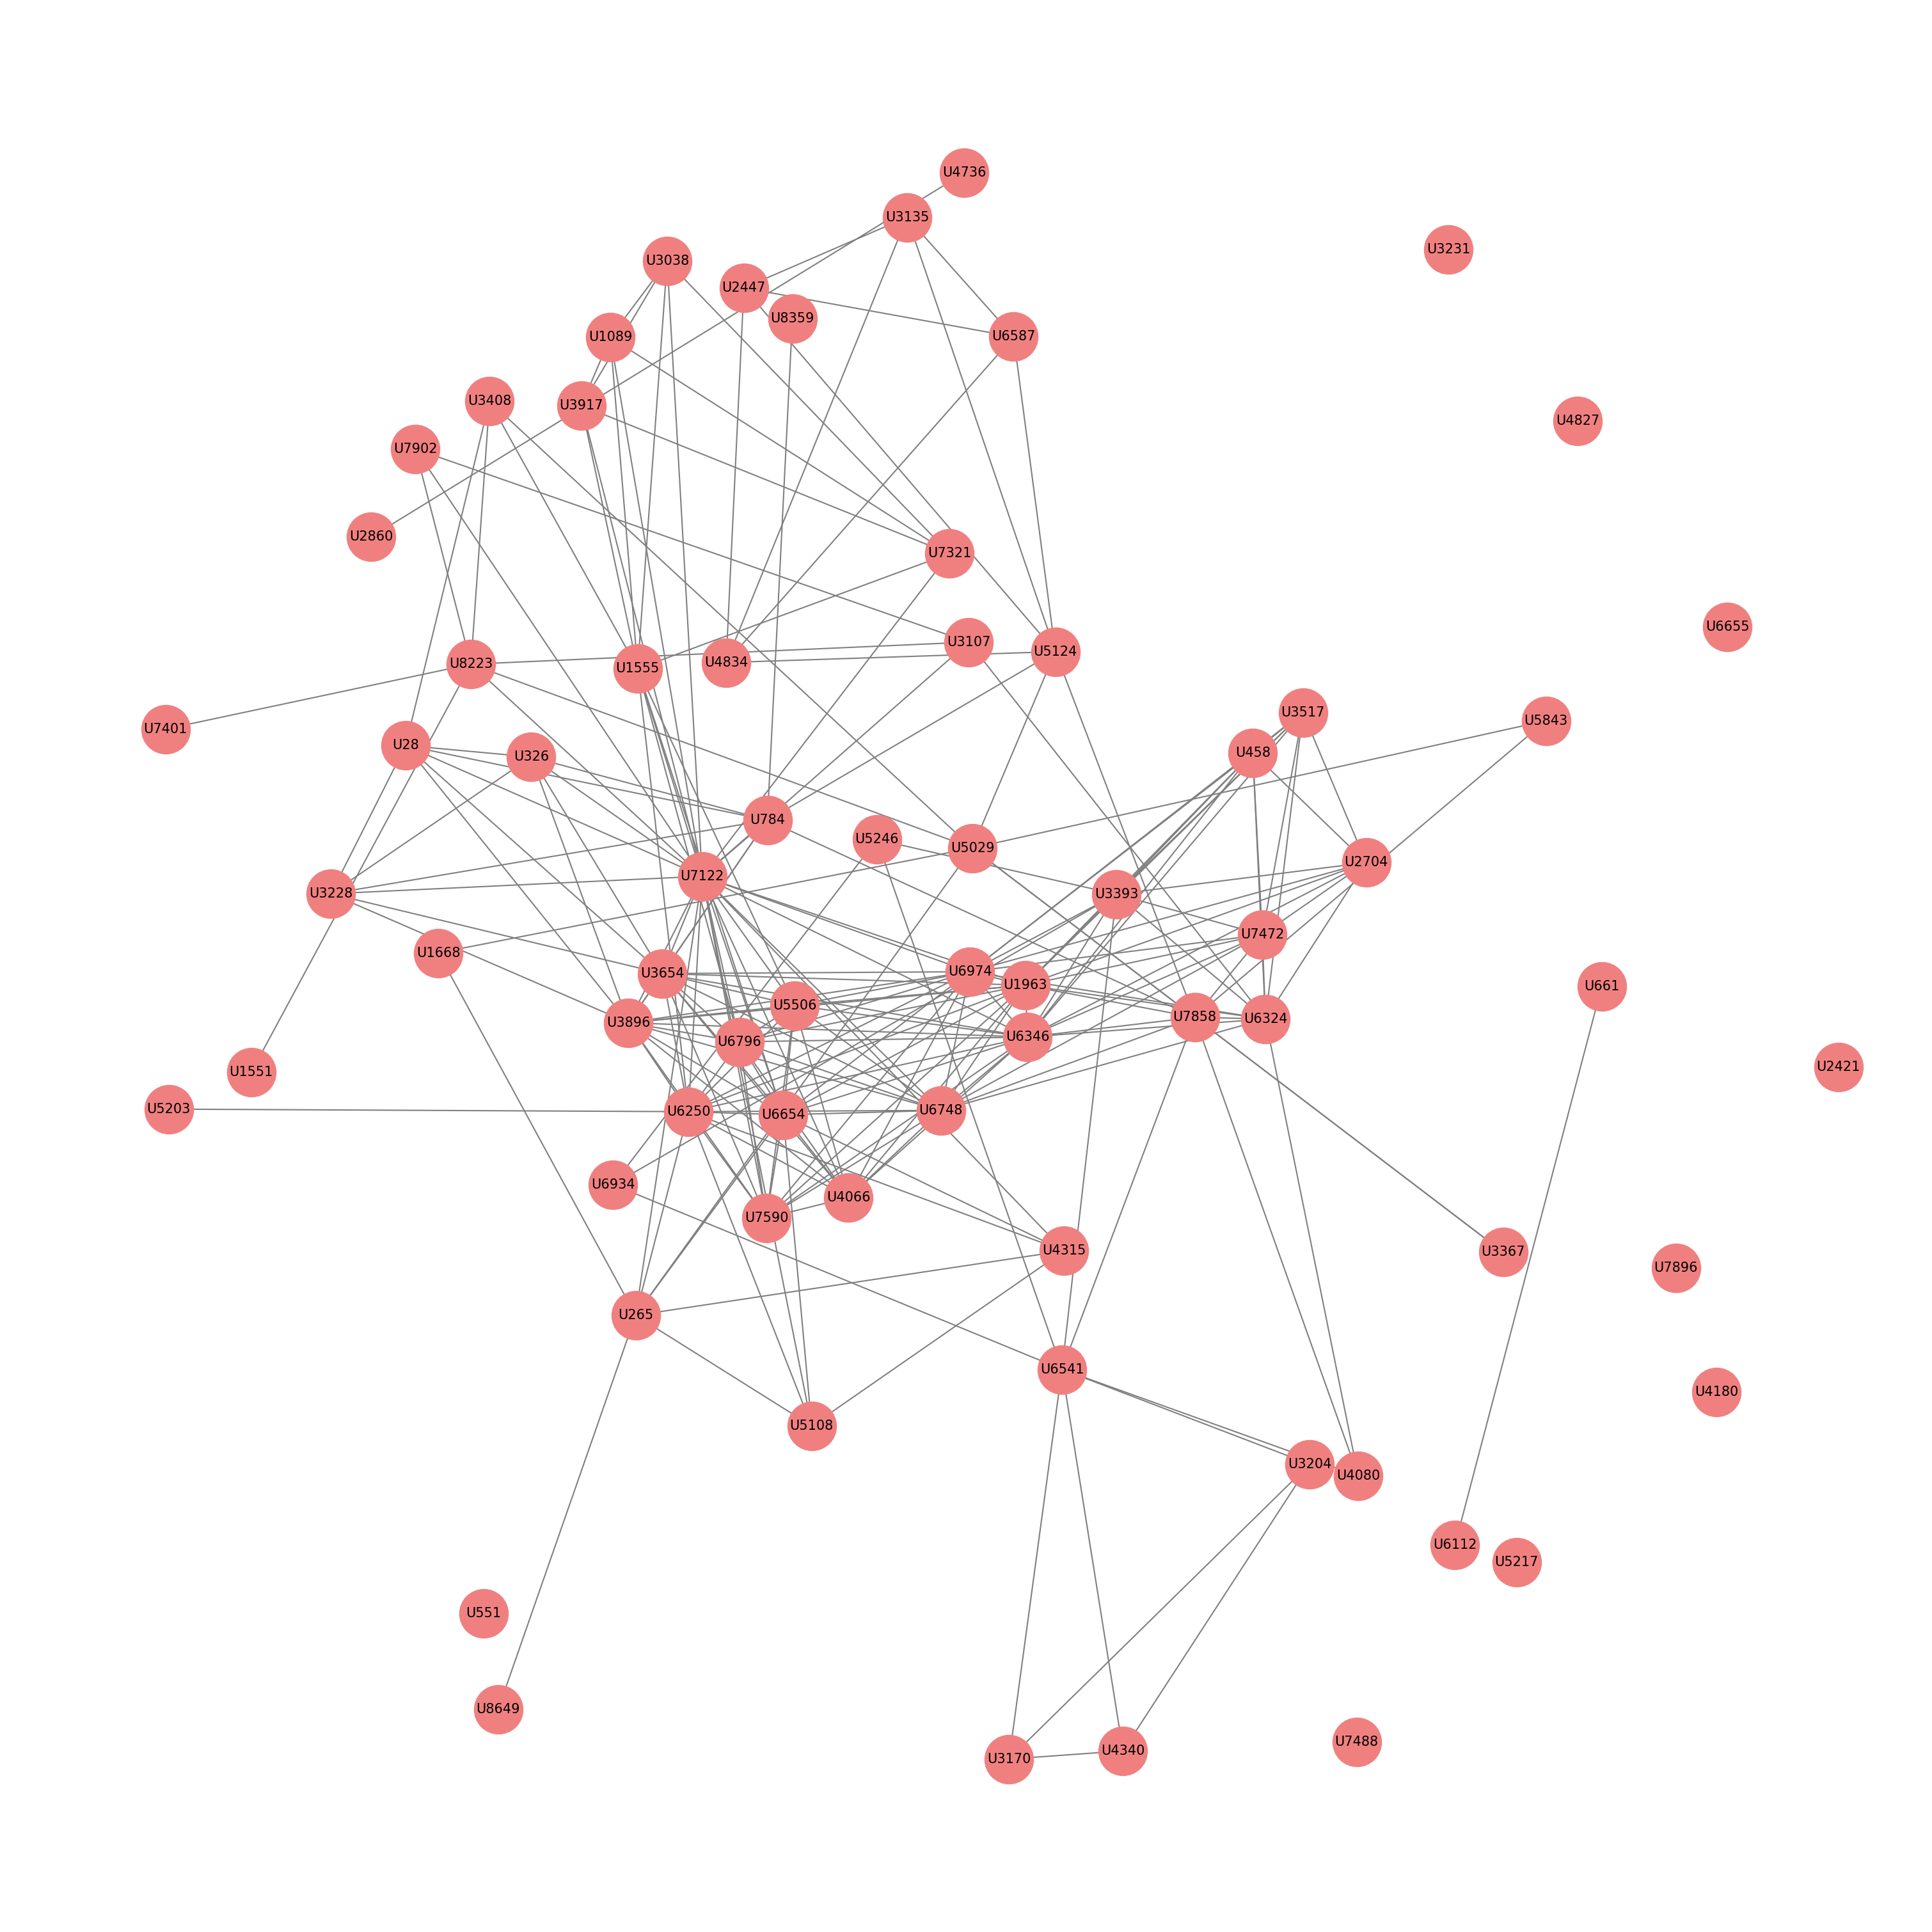

In [5]:
plt.figure(figsize=(30, 30))

# Vẽ đồ thị one-mode
pos = nx.spring_layout(user_movie, k=0.7)
nx.draw(user_movie, pos, with_labels=True, node_color='lightcoral', node_size=3000, font_size=15, edge_color='gray', width=1.5)
plt.show()

## Một số thuộc tính

In [6]:
# Số đỉnh số cạnh
print("Số đỉnh của đồ thị:", user_movie.number_of_nodes())
print("Số cạnh của đồ thị:", user_movie.number_of_edges())

Số đỉnh của đồ thị: 70
Số cạnh của đồ thị: 224


Đỉnh có nhiều cạnh kết nối nhất với các đỉnh khác.

In [7]:
degree_dict = dict(user_movie.degree())

max_degree_value = max(degree_dict.values())
print(f'Số mối quan hệ nhiều nhất là {max_degree_value}')

print('Các user có số quan hệ nhiều nhất là: ', end='')
print(', '.join(f'"{key}"' for key, value in degree_dict.items() if value == max_degree_value))

Số mối quan hệ nhiều nhất là 27
Các user có số quan hệ nhiều nhất là: "U7122"


## Tính toán các độ đo trên đồ thị

In [8]:
# Tính toán Degree Centrality
degree_centrality = nx.degree_centrality(user_movie)
print("Degree Centrality:", degree_centrality)

# Tính toán Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(user_movie)
print("Betweenness Centrality:", betweenness_centrality)

# Tính toán Closeness Centrality
closeness_centrality = nx.closeness_centrality(user_movie)
print("Closeness Centrality:", closeness_centrality)

# Tính toán Harmonic Centrality
harmonic_centrality = nx.harmonic_centrality(user_movie)
print("Harmonic Centrality:", harmonic_centrality)

# Tính toán Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(user_movie)
print("Eigenvector Centrality:", eigenvector_centrality)

# Tính toán PageRank
pagerank = nx.pagerank(user_movie)
print("PageRank:", pagerank)

Degree Centrality: {'U28': 0.10144927536231885, 'U265': 0.11594202898550725, 'U326': 0.08695652173913043, 'U458': 0.11594202898550725, 'U551': 0.0, 'U661': 0.014492753623188406, 'U784': 0.13043478260869565, 'U1089': 0.07246376811594203, 'U1551': 0.014492753623188406, 'U1555': 0.14492753623188406, 'U1668': 0.028985507246376812, 'U1963': 0.2753623188405797, 'U2421': 0.0, 'U2447': 0.057971014492753624, 'U2704': 0.11594202898550725, 'U2860': 0.014492753623188406, 'U3038': 0.07246376811594203, 'U3107': 0.057971014492753624, 'U3135': 0.057971014492753624, 'U3170': 0.043478260869565216, 'U3204': 0.043478260869565216, 'U3228': 0.08695652173913043, 'U3231': 0.0, 'U3367': 0.028985507246376812, 'U3393': 0.15942028985507248, 'U3408': 0.057971014492753624, 'U3517': 0.11594202898550725, 'U3654': 0.2318840579710145, 'U3896': 0.2318840579710145, 'U3917': 0.07246376811594203, 'U4066': 0.17391304347826086, 'U4080': 0.043478260869565216, 'U4180': 0.0, 'U4315': 0.07246376811594203, 'U4340': 0.043478260869

Tìm key player trong mạng xã hội.

In [9]:
def find_highest_centrality(graph):

    # Tìm node có giá trị cao nhất cho từng loại centrality
    max_degree_node = max(degree_centrality, key=degree_centrality.get)
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
    max_harmonic_node = max(harmonic_centrality, key=harmonic_centrality.get)
    max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
    max_pagerank_node = max(pagerank, key=pagerank.get)

    centrality_data = [
        ("Degree", max_degree_node, degree_centrality),
        ("Betweenness", max_betweenness_node, betweenness_centrality),
        ("Closeness", max_closeness_node, closeness_centrality),
        ("Harmonic", max_harmonic_node, harmonic_centrality),
        ("Eigenvector", max_eigenvector_node, eigenvector_centrality),
        ("PageRank", max_pagerank_node, pagerank)
    ]
    data = {
        "Centrality Type": [name for name, node, _ in centrality_data],
        "Node": [node for _, node, _ in centrality_data],
        "Value": [centrality[node] for _, node, centrality in centrality_data]
    }
    df = pd.DataFrame(data)
    print("Các node có giá trị cao nhất cho từng loại centrality:")
    print(df)

    return {
        "Degree": (max_degree_node, degree_centrality[max_degree_node]),
        "Closeness": (max_closeness_node, closeness_centrality[max_closeness_node]),
        "Betweenness": (max_betweenness_node, betweenness_centrality[max_betweenness_node]),
        "Harmonic": (max_harmonic_node, harmonic_centrality[max_harmonic_node]),
        "Eigenvector": (max_eigenvector_node, eigenvector_centrality[max_eigenvector_node]),
        "PageRank": (max_pagerank_node, pagerank[max_pagerank_node])
    }

In [10]:
def plot_graph_with_centrality(graph, centrality_results):
    centrality_colors = {
        "Degree": "red",
        "Closeness": "blue",
        "Betweenness": "yellow",
        "Harmonic": "purple",
        "Eigenvector": "orange",
        "PageRank": "cyan"
    }

    plt.figure(figsize=(30, 30))
    plt.axis('off')

    pos = nx.spring_layout(graph, k=0.7)

    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)

    for centrality, (node, _) in centrality_results.items():
        nx.draw_networkx_nodes(graph, pos, nodelist=[node], node_color=centrality_colors[centrality], label=centrality, node_size=1500)

    # Draw remaining nodes (non-highlighted) in gray
    remaining_nodes = set(graph.nodes) - {node for node, _ in centrality_results.values()}
    nx.draw_networkx_nodes(graph, pos, nodelist=list(remaining_nodes), node_color="gray", alpha=0.5, node_size=3000)

    plt.show()

Các node có giá trị cao nhất cho từng loại centrality:
  Centrality Type   Node      Value
0          Degree  U7122   0.391304
1     Betweenness  U7122   0.186029
2       Closeness  U7122   0.449993
3        Harmonic  U7122  39.083333
4     Eigenvector  U7122   0.288718
5        PageRank  U7122   0.055270


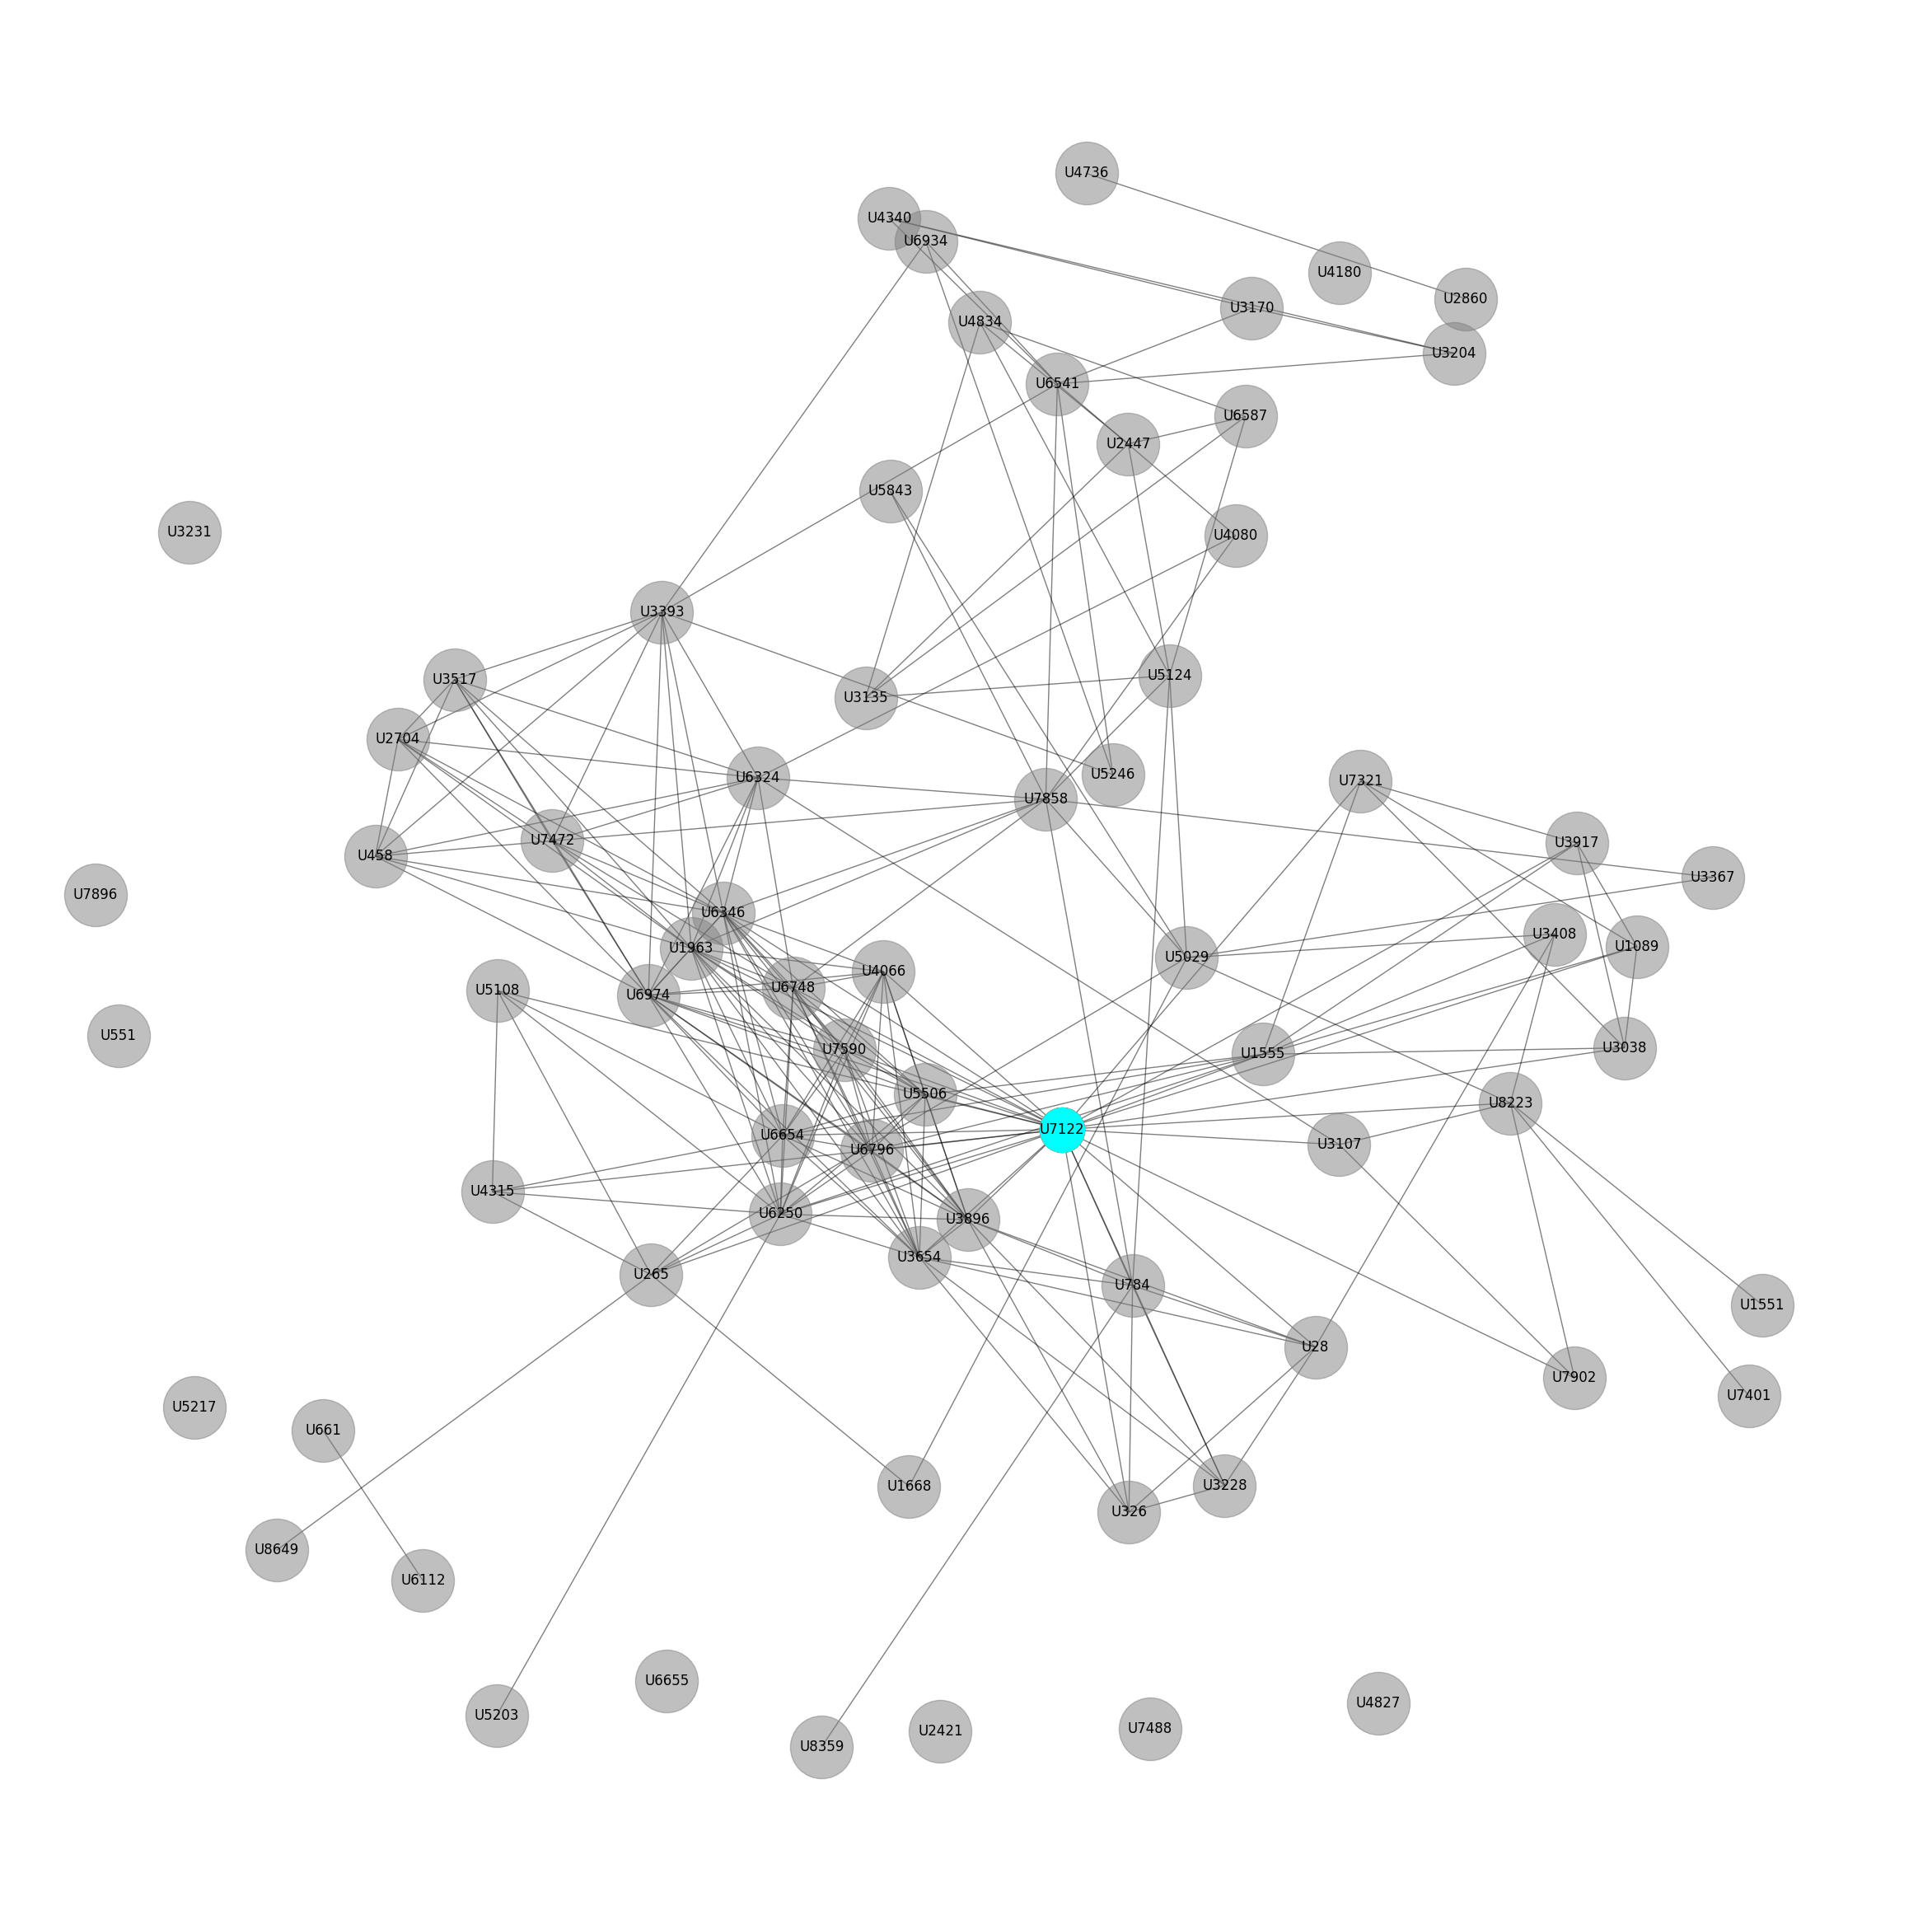

In [11]:
result = find_highest_centrality(user_movie)
plot_graph_with_centrality(user_movie, result)

## Khám phá cộng đồng


### Thuật toán Girvan Newman

Tìm giá trị K tại bước phân chia cộng đồng với độ liên kết modularity tốt nhất

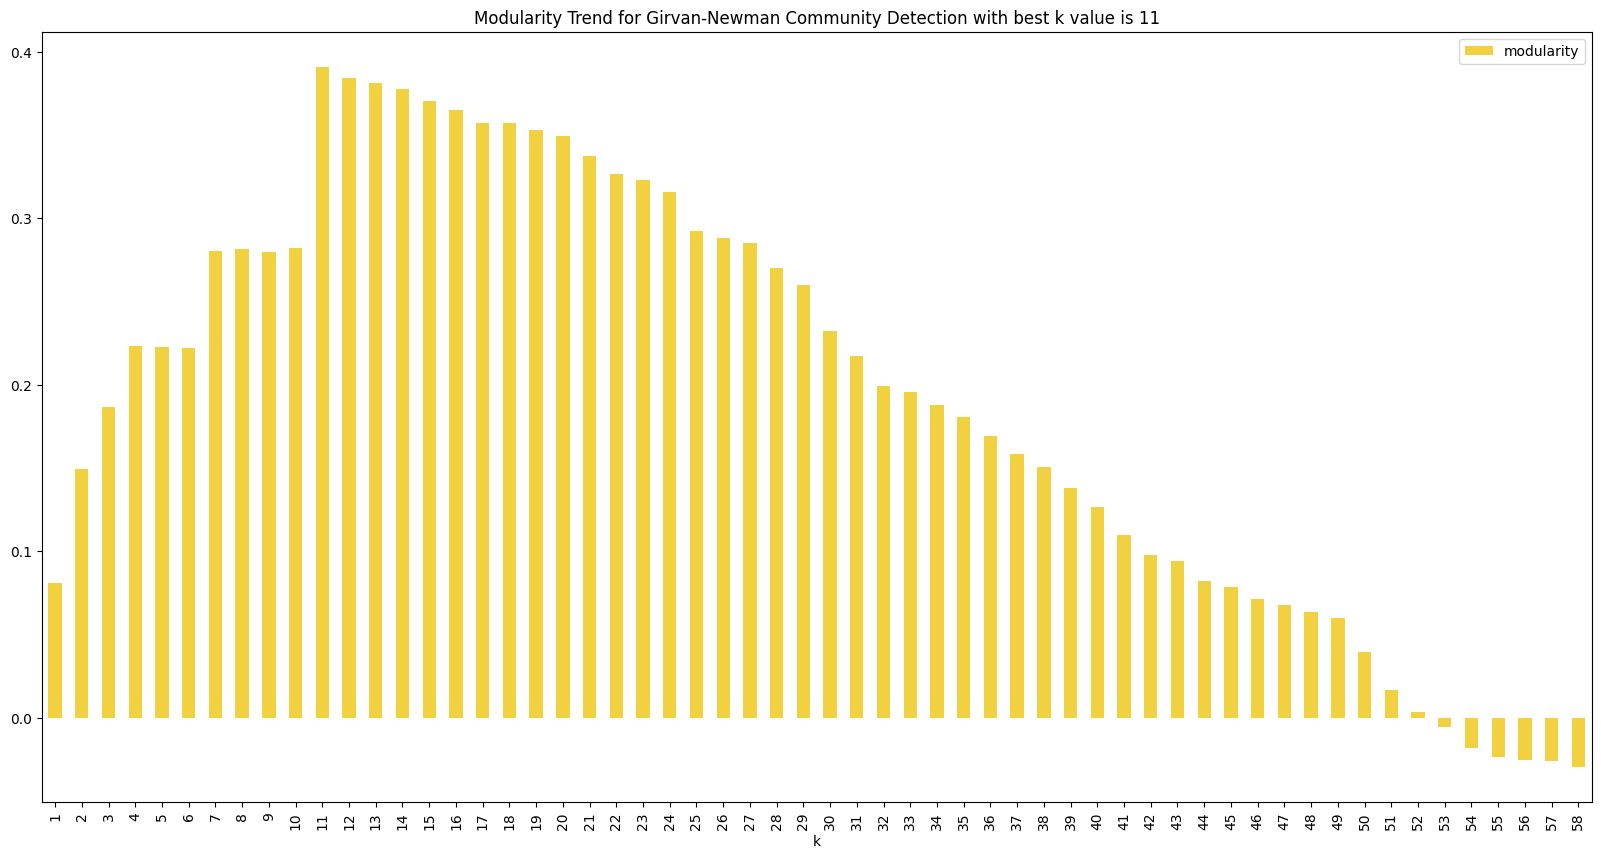

In [12]:
G = user_movie.copy()

# Find communities using Girvan-Newman
communities = list(nx.community.girvan_newman(G))

# Calculate modularity for each partition level
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)

# Find the k value with the highest modularity
best_k = (modularity_df.loc[modularity_df["modularity"]
                            .idxmax()]["k"]).astype(int)

fig, ax = plt.subplots(figsize=(20, 10))

# Plot change in modularity
modularity_df.plot.bar(
    x="k",
    y="modularity",
    ax=ax,
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection with best k value is " + str(best_k),
)
plt.show()

Trực quan các cộng đồng được phân chia sau 2 mốc đại diện

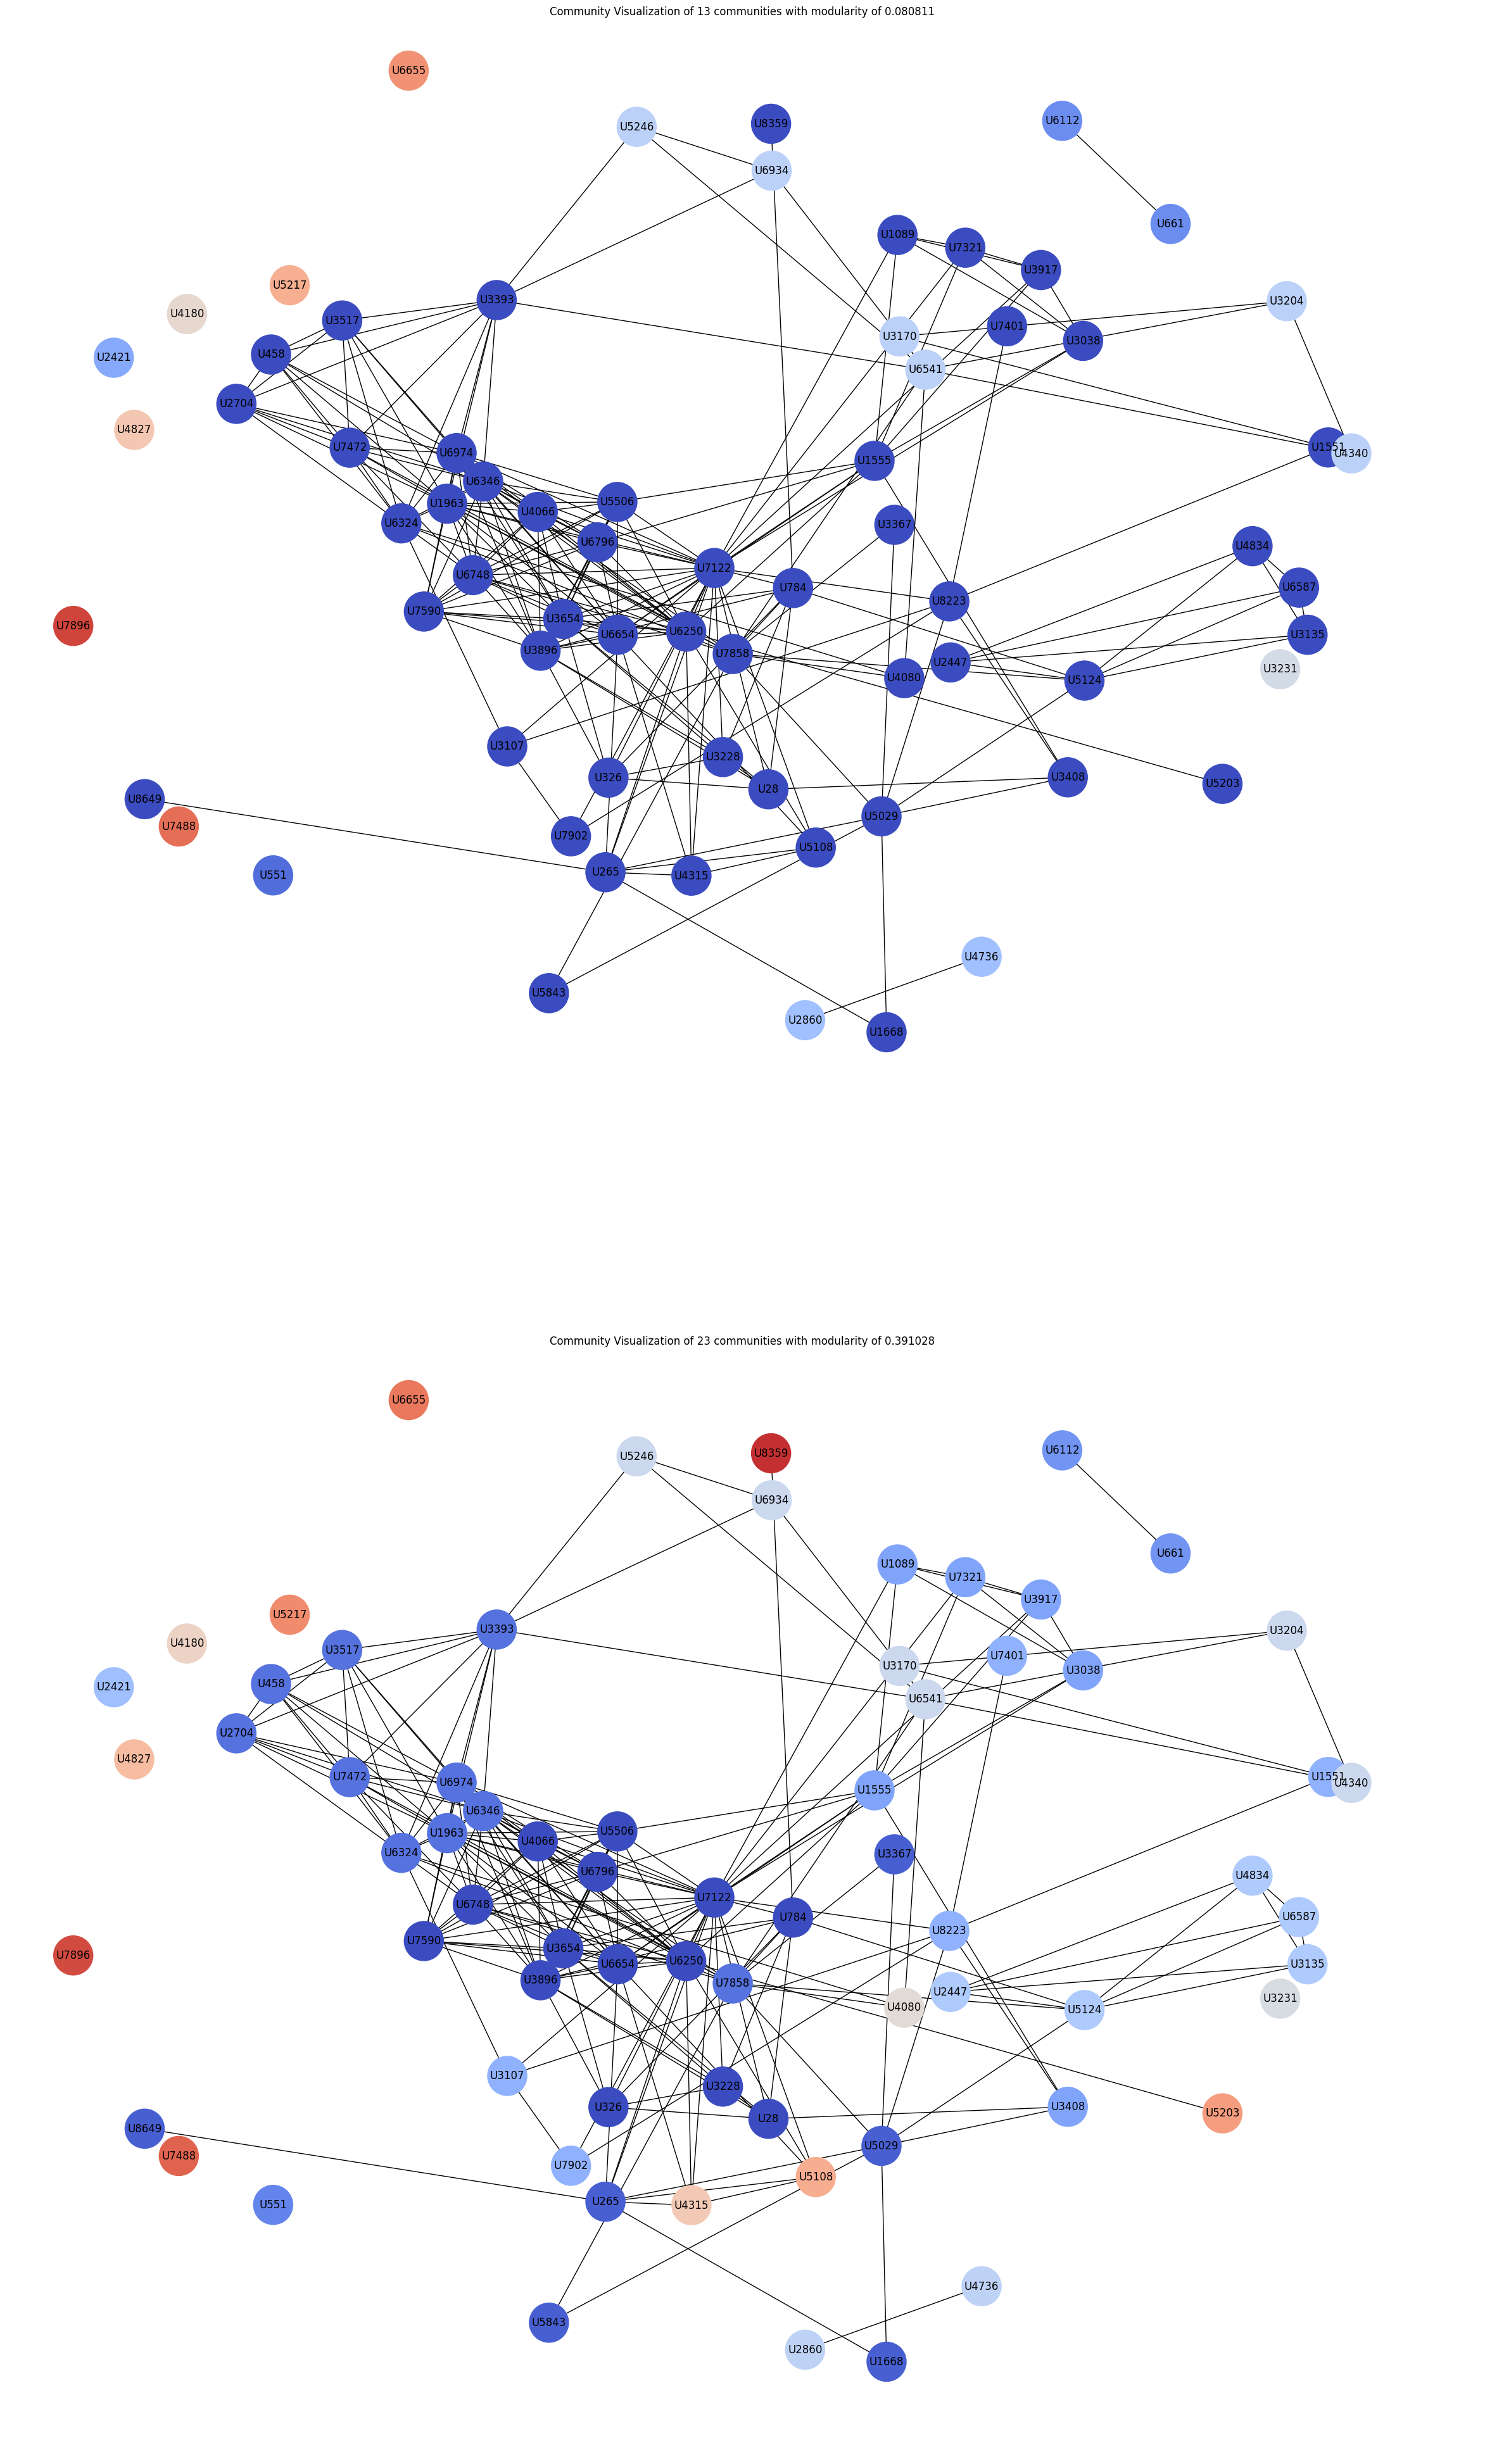

In [13]:
def create_community_node_colors(graph, communities):
    num_communities = len(communities)
    cmap = plt.colormaps['coolwarm']
    node_colors = []
    for node in graph:
        for i, community in enumerate(communities):
            if node in community:
                node_colors.append(cmap(i / num_communities))
                break
    return node_colors

# Function to plot graph with node colors based on communities
def visualize_communities(graph, communities, subplot_index):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.7, iterations=50, seed=2)
    plt.subplot(2, 1, subplot_index)
    plt.title(title)

    nx.draw(
        graph, pos=pos, node_size=2000, node_color=node_colors,
        with_labels=True, font_size=12, font_color="black",
    )
fig, ax = plt.subplots(2, figsize=(30, 50))

# k = 1
visualize_communities(G, communities[0], 1)
# k (best)
visualize_communities(G, communities[best_k-1], 2)

Xây dựng gợi ý phim cho từng user trong các cộng đồng được phân chia theo thuật toán

In [14]:
partition = {node: idx for idx, community in enumerate(communities[best_k-1]) for node in community}

user_movie_history = {}
for user, movie in edges:
    if user not in user_movie_history:
        user_movie_history[user] = []
    user_movie_history[user].append(movie)

# Tạo danh sách phim phổ biến trong từng cộng đồng
community_recommendations = {}
for community_id in set(partition.values()):
    # Lấy danh sách các thành viên trong cộng đồng
    community_members = [user for user, com_id in partition.items() if com_id == community_id]

    # Đếm các bộ phim đã xem trong cộng đồng
    movie_counter = Counter()
    for user in community_members:
        movies = user_movie_history.get(user, [])
        movie_counter.update(movies)

    # Chọn top 5 phim phổ biến trong cộng đồng
    popular_movies = [movie for movie, _ in movie_counter.most_common(20)]
    community_recommendations[community_id] = popular_movies

# Tạo gợi ý cho từng người dùng
user_recommendations = {}
for user, community_id in partition.items():
    # Lấy phim phổ biến trong cộng đồng mà người dùng chưa xem
    movies_watched = set(user_movie_history.get(user, []))
    recommendations = [movie for movie in community_recommendations[community_id] if movie not in movies_watched]
    user_recommendations[user] = recommendations

#########################################################################
user = 'U28'
print(f"Recommendation for user {user} based on community:")
print(user_recommendations[user])

Recommendation for user U28 based on community:
[872585, 569094, 575264, 603692, 881164, 999644, 864692, 726759, 882569, 457332, 968051, 747188, 666277, 493529, 912908, 640146, 594767, 667538, 298618]


### Thuật toán Louvain

```bash
pip install python-louvain
```

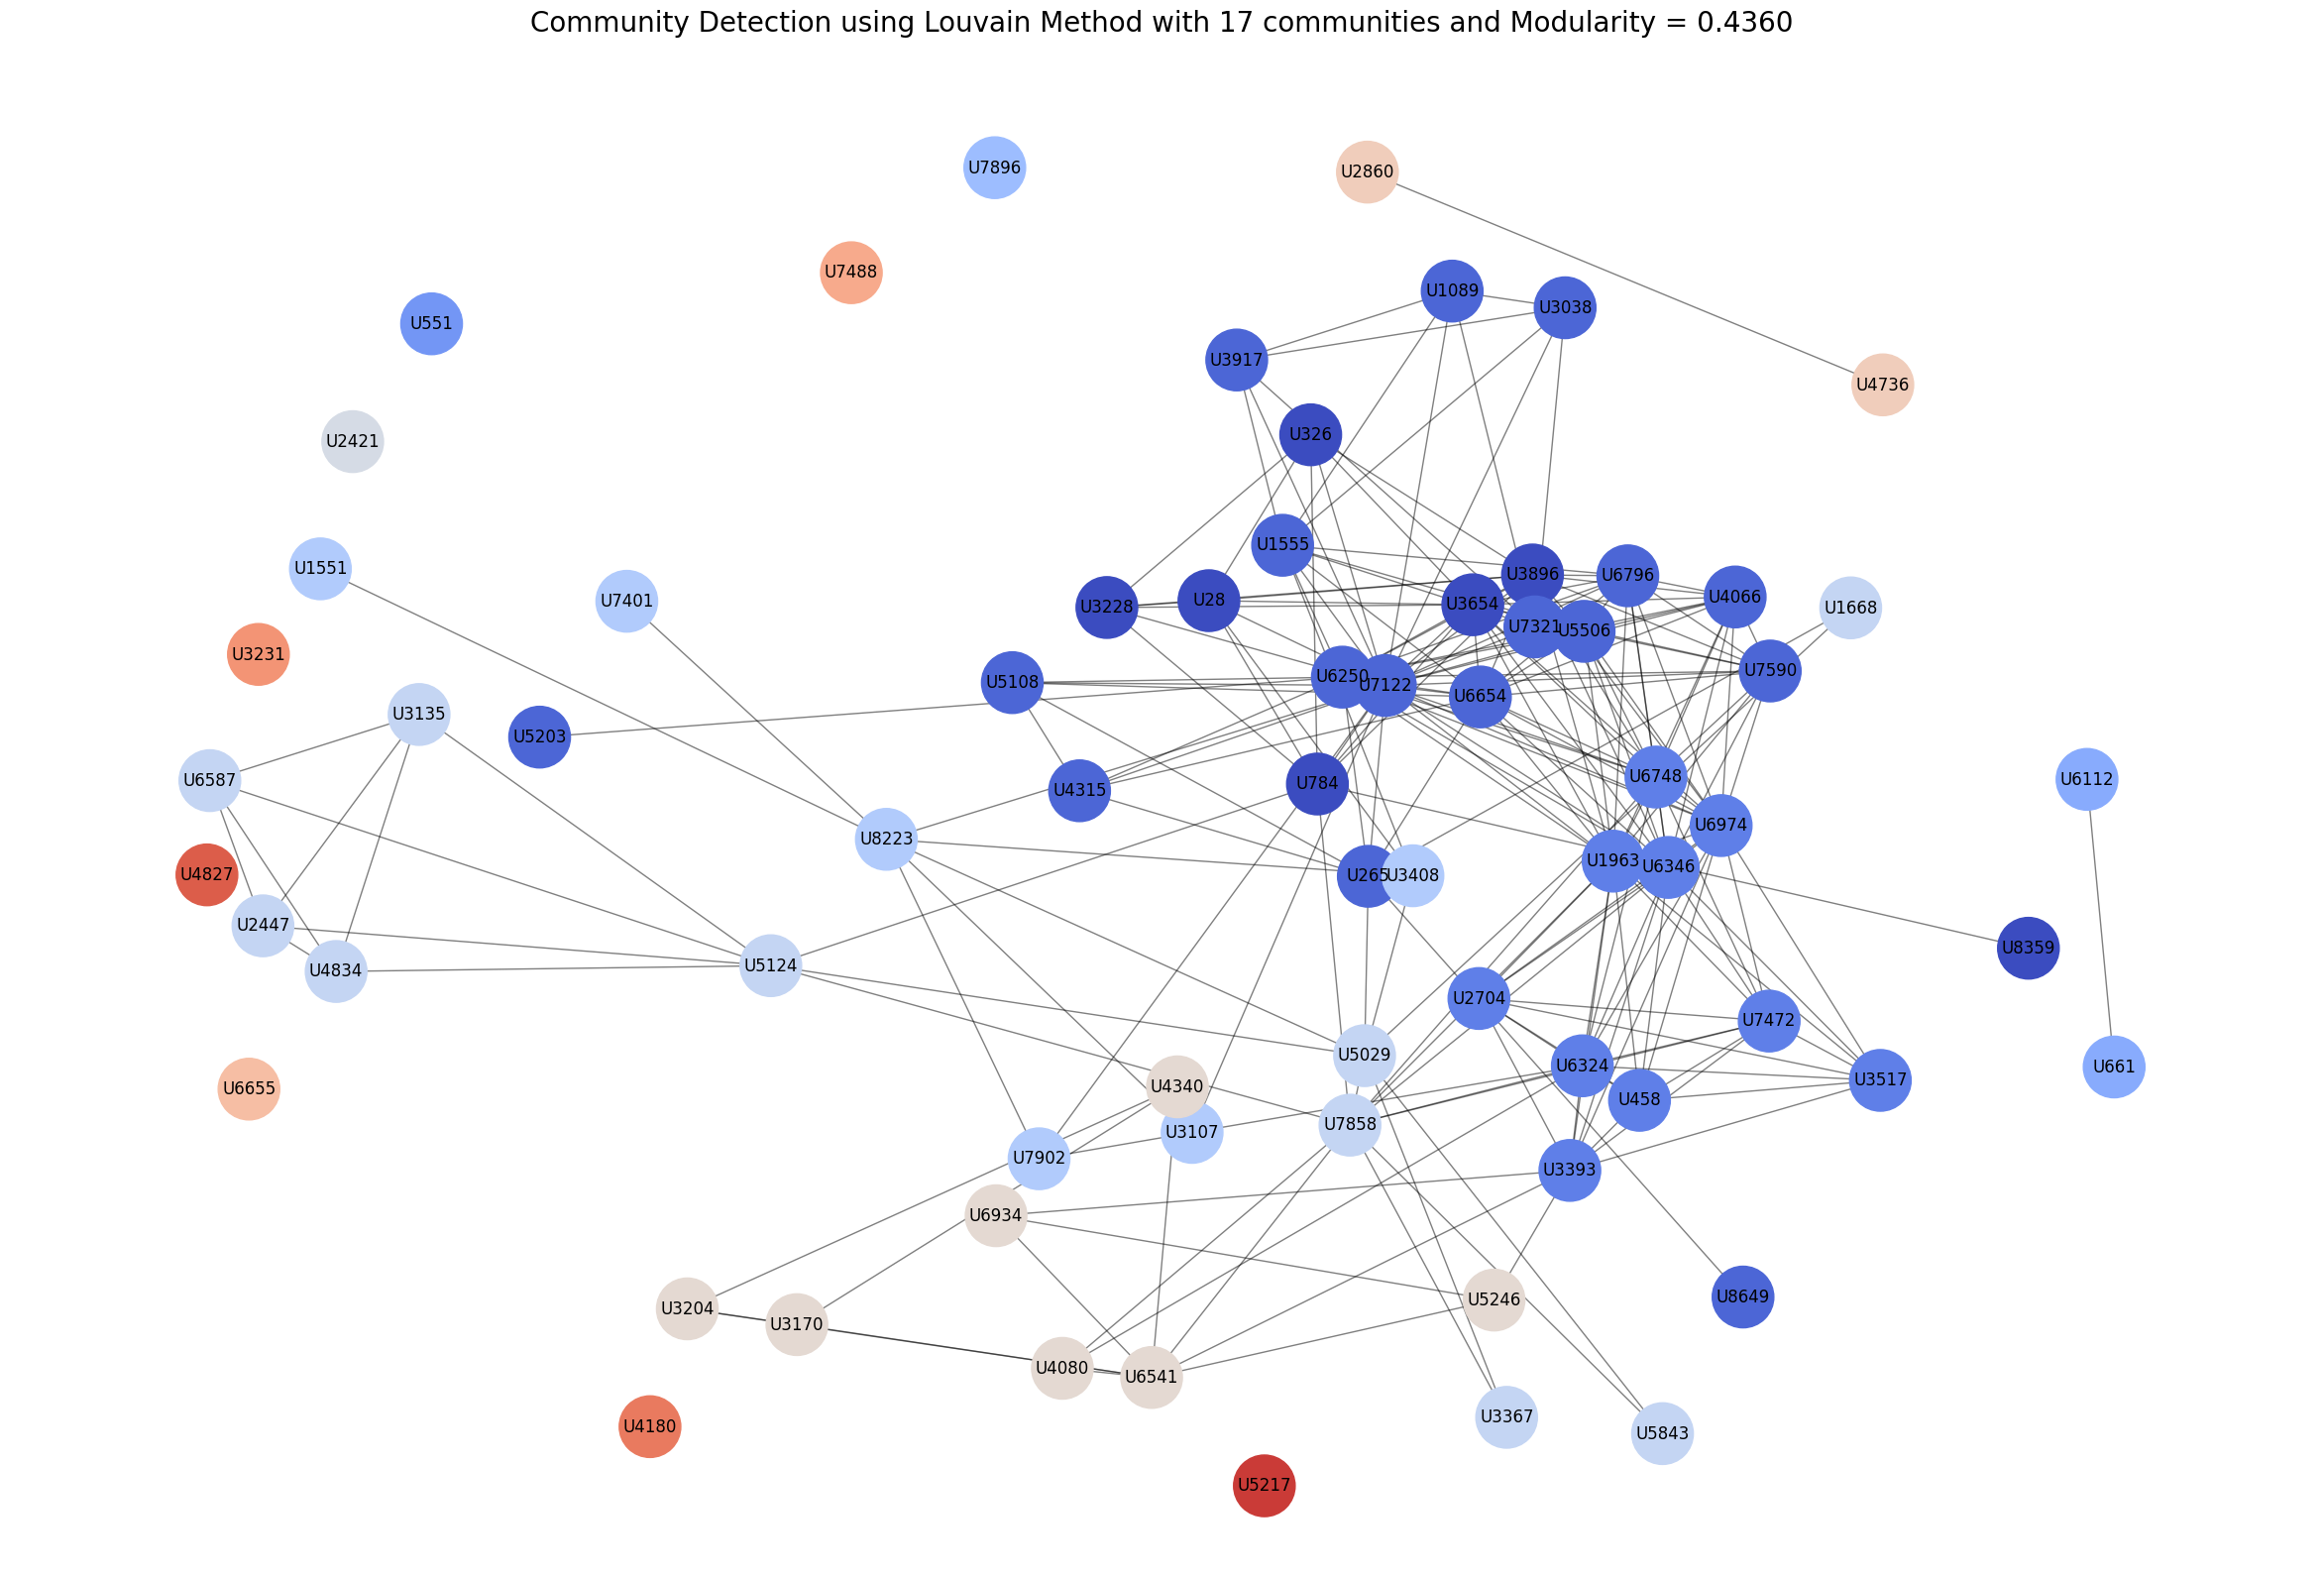

In [15]:
G = user_movie.copy()

# Sử dụng thuật toán Louvain để phát hiện cộng đồng
partition = community_louvain.best_partition(G)

# Chuyển đổi partition thành danh sách cộng đồng
louvain_communities = []
for community_id in set(partition.values()):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    louvain_communities.append(community_nodes)

# Tính toán Modularity cho phân chia cộng đồng Louvain
modularity_value = nx.community.modularity(G, louvain_communities)

# Hiển thị cộng đồng trên biểu đồ
value = list(partition.values())

plt.figure(figsize=(30, 20))
plt.axis('off')
pos = nx.spring_layout(G, k=0.7)
cmap = plt.colormaps['coolwarm']  # Lấy bảng màu 'coolwarm'

# Tạo màu sắc cho từng nút
num_colors = max(value) + 1
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Vẽ các nút và các cạnh
nx.draw_networkx_nodes(G, pos, node_size=2000,
                       node_color=[colors[partition[node]] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

# Thêm giá trị Modularity vào tiêu đề
plt.title(f"Community Detection using Louvain Method with {num_colors} communities and Modularity = {modularity_value:.4f}", fontsize=20)

plt.show()

In [16]:
user_movie_history = {}
for user, movie in edges:
    if user not in user_movie_history:
        user_movie_history[user] = []
    user_movie_history[user].append(movie)

# Tạo danh sách phim phổ biến trong từng cộng đồng
community_recommendations = {}
for community_id in set(partition.values()):
    # Lấy danh sách các thành viên trong cộng đồng
    community_members = [user for user, com_id in partition.items() if com_id == community_id]

    # Đếm các bộ phim đã xem trong cộng đồng
    movie_counter = Counter()
    for user in community_members:
        movies = user_movie_history.get(user, [])
        movie_counter.update(movies)

    # Chọn top 5 phim phổ biến trong cộng đồng
    popular_movies = [movie for movie, _ in movie_counter.most_common(20)]
    community_recommendations[community_id] = popular_movies

# Tạo gợi ý cho từng người dùng
user_recommendations = {}
for user, community_id in partition.items():
    # Lấy phim phổ biến trong cộng đồng mà người dùng chưa xem
    movies_watched = set(user_movie_history.get(user, []))
    recommendations = [movie for movie in community_recommendations[community_id] if movie not in movies_watched]
    user_recommendations[user] = recommendations

#########################################################################
user = 'U28'
print(f"Recommendation for user {user} based on community:")
print(user_recommendations[user])

Recommendation for user U28 based on community:
[298618, 872585, 640146, 594767, 667538, 385687, 697843, 881164, 999644, 555285, 1001811]


---

# Dự đoán liên kết (phương pháp Heuristics)

Dựa trên Common Neighbors (CN), Jaccard Coefficient (JC), Adamic-Adar Index (AA) và Preferential Attachment (PA)

In [17]:
# === 2. Dự đoán liên kết bằng Heuristics ===
predicted_links = []

# Ngưỡng liên kết tốt
threshold_CN = 1
threshold_JC = 0.1
threshold_AA = 0.5
threshold_PA = 1.0

# Common Neighbors
cn_scores = []
for u, v in combinations(user_movie.nodes(), 2):  # Tất cả các cặp user
    if not user_movie.has_edge(u, v):  # Chỉ xét cặp user chưa liên kết
        common_neighbors = len(list(nx.common_neighbors(user_movie, u, v)))
        if common_neighbors >= threshold_CN:
            cn_scores.append((u, v, common_neighbors))

# Jaccard Coefficient
jaccard_scores = list(nx.jaccard_coefficient(user_movie))
for u, v, score in jaccard_scores:
    if score >= threshold_JC:
        predicted_links.append((u, v, "Jaccard Coefficient", score))

# Adamic-Adar Index
adamic_adar_scores = list(nx.adamic_adar_index(user_movie))
for u, v, score in adamic_adar_scores:
    if score >= threshold_AA:
        predicted_links.append((u, v, "Adamic-Adar Index", score))

# Preferential Attachment
pa_scores = list(nx.preferential_attachment(user_movie))
for u, v, score in pa_scores:
    if score >= threshold_PA:
        predicted_links.append((u, v, "Preferential Attachment", score))

# === 3. Gợi ý phim cho user dựa trên liên kết mạnh ===
recommendations = {}

# Tạo dictionary lưu phim mà mỗi user đã xem
user_to_movies = ratings.groupby('userId')['tmdbId'].apply(set).to_dict()

for u, v, method, score in predicted_links:
    # Khởi tạo danh sách gợi ý nếu chưa có
    if u not in recommendations:
        recommendations[u] = set()
    if v not in recommendations:
        recommendations[v] = set()

    # Gợi ý phim từ user này cho user kia
    movies_u = user_to_movies.get(u, set())
    movies_v = user_to_movies.get(v, set())

    recommendations[u].update(movies_v - movies_u)  # Gợi ý phim của v cho u
    recommendations[v].update(movies_u - movies_v)  # Gợi ý phim của u cho v

# === 4. Lọc top n bộ phim được gợi ý nhiều nhất cho mỗi user ===
top_n = 20  # Số lượng phim gợi ý tối đa cho mỗi user

# Lưu trữ kết quả gợi ý top n phim cho mỗi user
top_recommendations = {}

# Đếm số lần mỗi bộ phim được gợi ý cho mỗi user
for user, movies in recommendations.items():
    movie_counts = Counter(movies)  # Đếm số lần mỗi phim xuất hiện
    top_movies = movie_counts.most_common(top_n)  # Lấy top n phim
    top_recommendations[user] = [movie for movie, _ in top_movies]

# === 5. Kết quả ===
print("\nGợi ý phim cho từng user (Top n gợi ý):")
for user, top_movies in top_recommendations.items():
    print(f"{user}: {top_movies}")



Gợi ý phim cho từng user (Top n gợi ý):
U3228: [736769, 569094, 635910, 1015303, 913673, 980489, 1134865, 614930, 800787, 1016084, 555285, 878361, 1000475, 575264, 934433, 631842, 1121575, 353577, 616747, 603692]
U7902: [736769, 635910, 1015303, 569094, 913673, 980489, 881164, 1134865, 614930, 800787, 1016084, 555285, 878361, 1000475, 575264, 934433, 631842, 1121575, 353577, 616747]
U1963: [736769, 635910, 1015303, 569094, 980489, 913673, 881164, 1134865, 614930, 800787, 1016084, 555285, 575264, 934433, 631842, 353577, 616747, 758323, 737853, 762430]
U3408: [736769, 569094, 635910, 1015303, 913673, 980489, 881164, 912908, 1134865, 614930, 800787, 1016084, 555285, 878361, 1000475, 575264, 934433, 631842, 1121575, 616747]
U6346: [736769, 635910, 1015303, 569094, 980489, 913673, 881164, 1134865, 614930, 800787, 1016084, 555285, 575264, 934433, 631842, 353577, 616747, 758323, 737853, 762430]
U6250: [736769, 635910, 980489, 913673, 881164, 1134865, 614930, 800787, 1016084, 555285, 1000475,

# Lan truyền thông tin (Information Diffusion)

## Mô hình IC

Chọn ngẫu nhiên 5 user để lan truyền thông tin theo mô hình IC, kiểm tra số nút bị ảnh hưởng khi lan truyền.

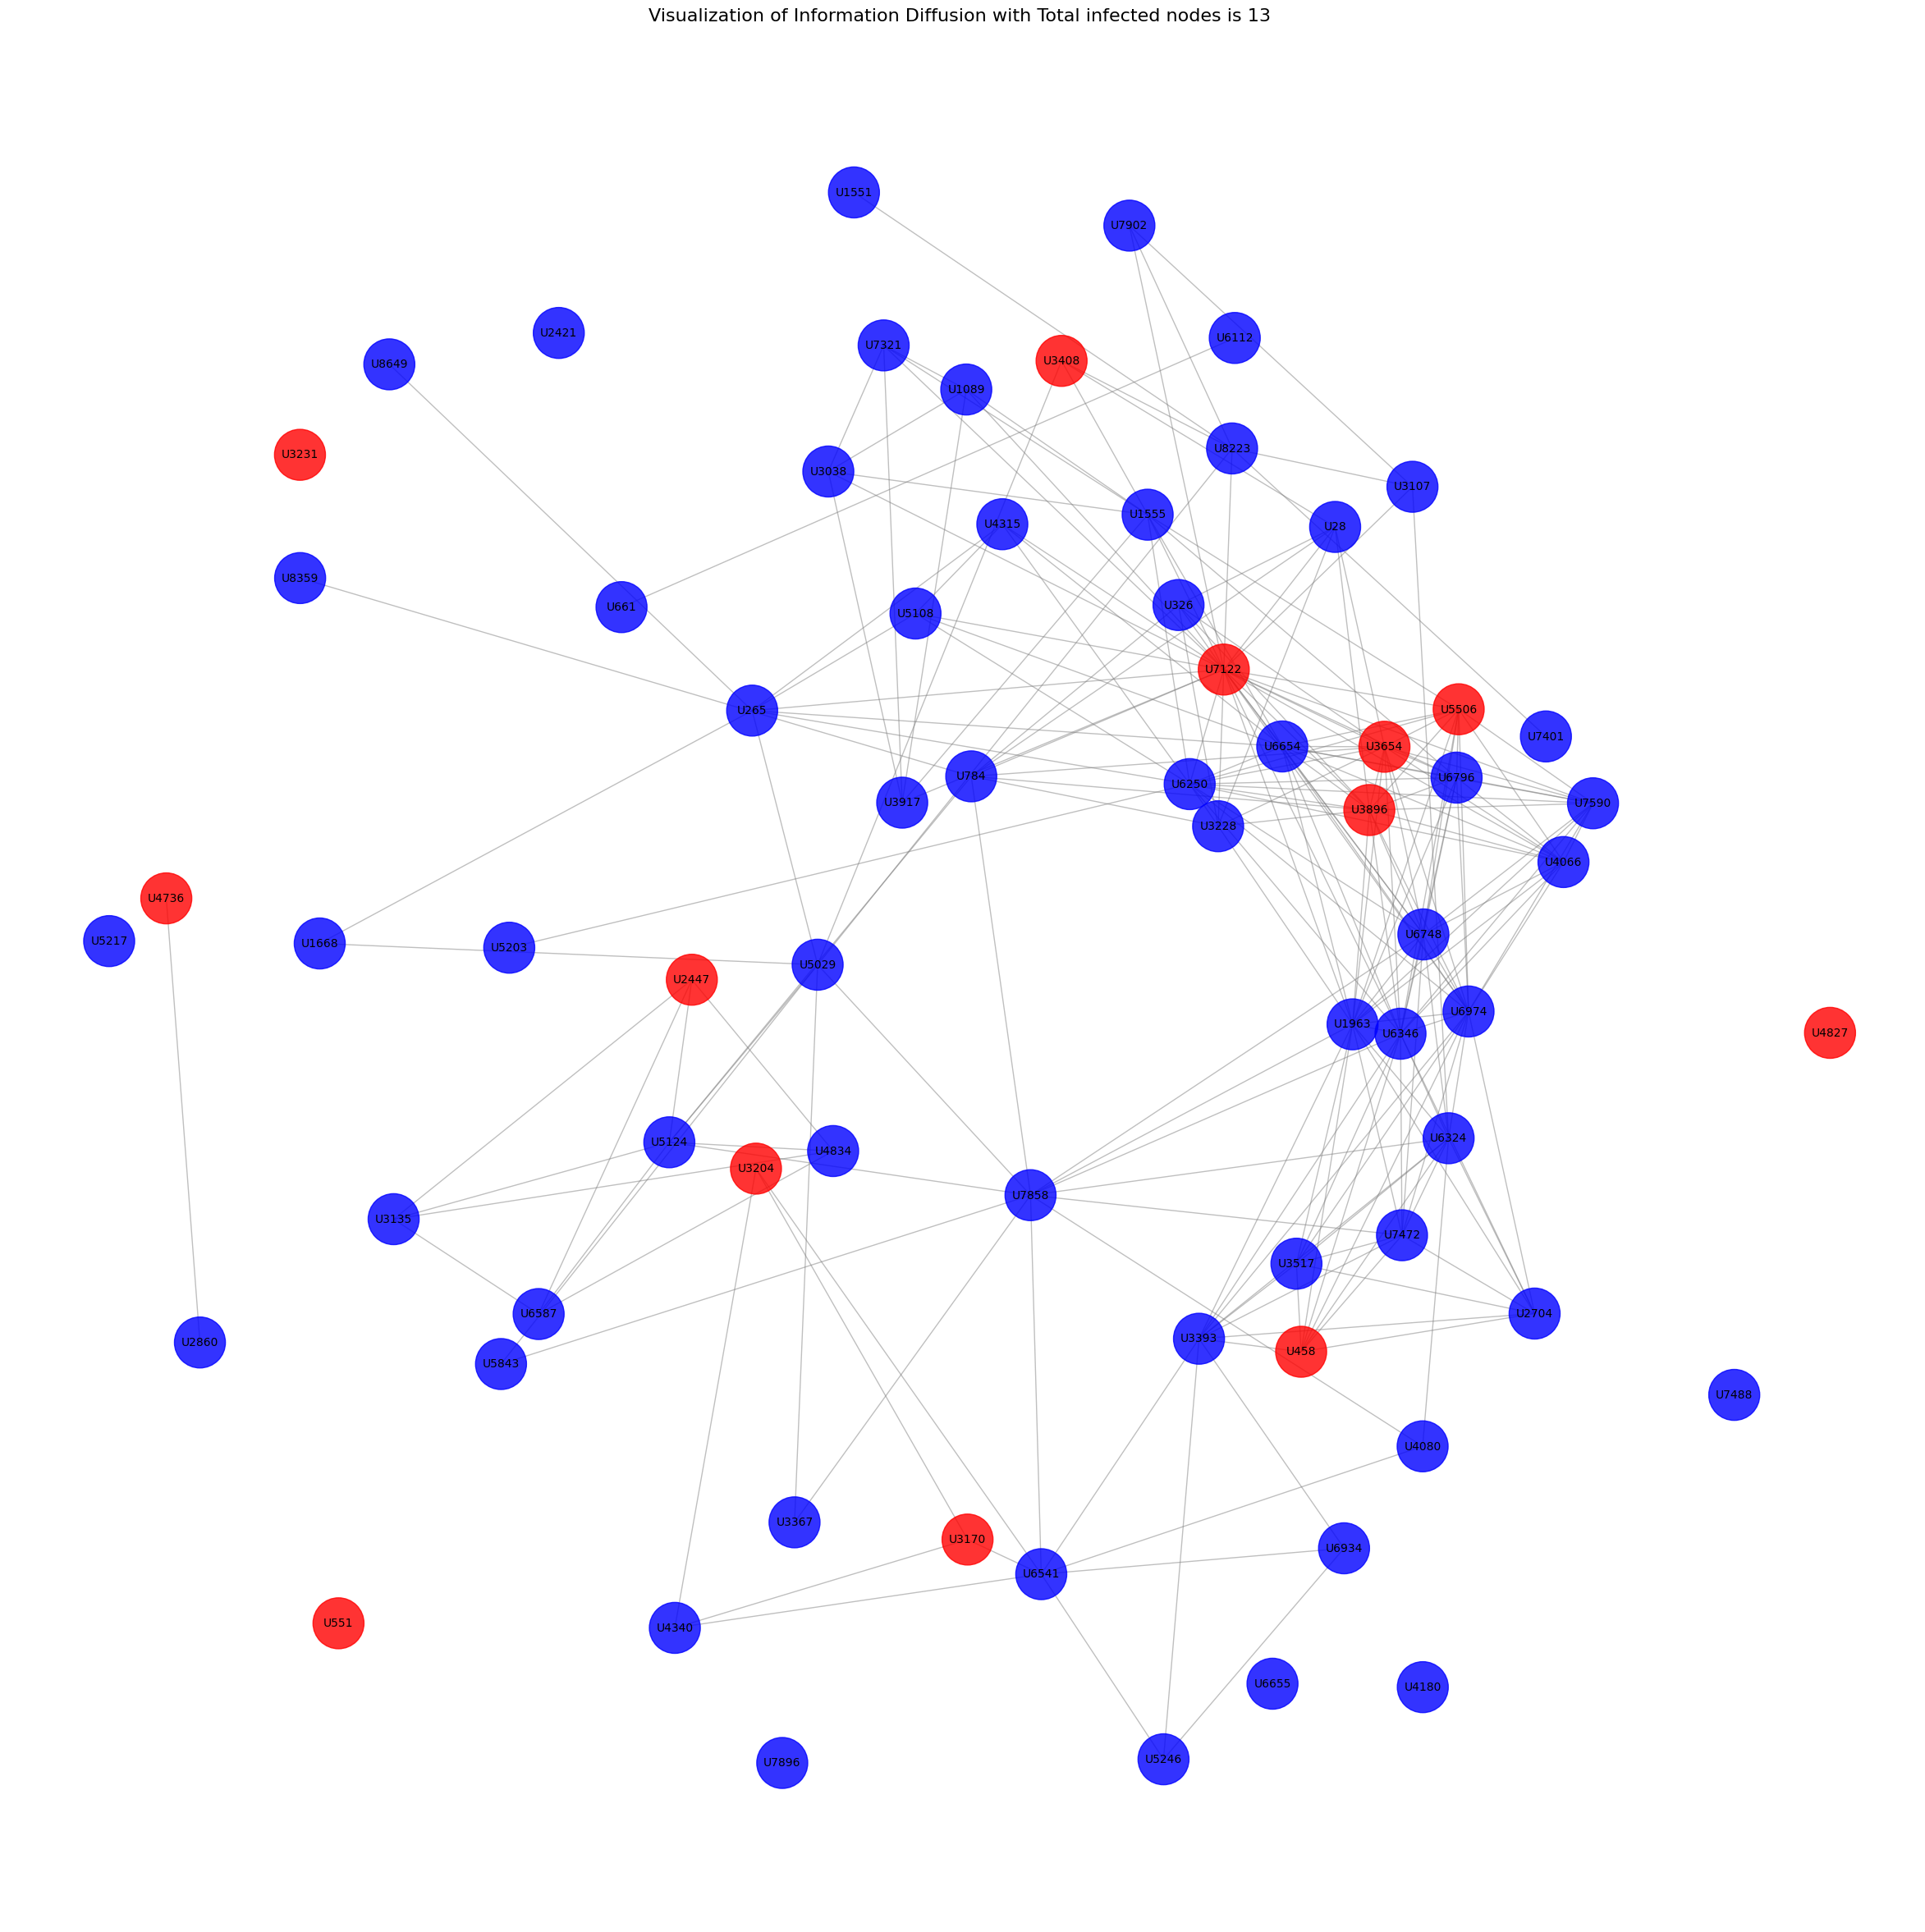

In [18]:
# -------------------------------
# LAN TRUYỀN THÔNG TIN (INFORMATION DIFFUSION)
# -------------------------------
# Mô hình Independent Cascade
import random

def independent_cascade(G, initial_nodes, p=0.1):
    """Mô phỏng lan truyền thông tin theo mô hình Independent Cascade (IC)."""
    if not initial_nodes:
        return set()  # Trả về một tập hợp rỗng nếu không có nút khởi tạo

    active = set(initial_nodes)  # Các nút đã lây nhiễm
    new_active = set(initial_nodes)  # Các nút mới bị lây nhiễm trong mỗi vòng lặp

    while new_active:
        next_active = set()  # Các nút sẽ bị lây nhiễm trong vòng tiếp theo
        for node in new_active:
            for neighbor in G.neighbors(node):
                if neighbor not in active:  # Chỉ lây nhiễm nếu hàng xóm chưa bị lây nhiễm
                    if random.random() < p:  # Xác suất lây nhiễm
                        next_active.add(neighbor)
        if not next_active:  # Nếu không có nút nào bị lây nhiễm trong vòng này, dừng lại
            break
        active.update(next_active)
        new_active = next_active

    return active


# Khởi tạo nút nguồn lan truyền
initial_nodes = random.sample(list(user_movie.nodes()), k=10)

# Mô phỏng lan truyền thông tin
infected_nodes = independent_cascade(user_movie, initial_nodes, p=0.05)

# -------------------------------
# VIZUALIZATION
# -------------------------------
# Xác định vị trí của các nút bằng cách sử dụng layout (spring layout được chọn để dễ nhìn)
pos = nx.spring_layout(user_movie, k=0.7)  # Cố định layout để đồ thị không thay đổi mỗi lần vẽ

# Vẽ đồ thị
plt.figure(figsize=(30, 30))  # Kích thước đồ thị

# Tô màu các nút: nút bị lây nhiễm là đỏ, nút khác là xanh
node_colors = ['red' if node in infected_nodes else 'blue' for node in user_movie.nodes()]  # Sử dụng infected_nodes

# Vẽ các nút
nx.draw_networkx_nodes(
    user_movie,
    pos,
    node_color=node_colors,
    node_size=2000,  # Tăng kích thước nút
    alpha=0.8       # Làm nút trong suốt một chút để dễ quan sát
)

# Vẽ các cạnh
nx.draw_networkx_edges(
    user_movie,
    pos,
    edge_color="gray",
    alpha=0.5,  # Độ trong suốt của cạnh
    width=1     # Độ dày cạnh
)

# Thêm nhãn vào các nút
nx.draw_networkx_labels(
    user_movie,
    pos,
    font_size=10,  # Kích thước chữ
    font_color="black"
)

# Tiêu đề và hiển thị đồ thị
plt.title(f"Visualization of Information Diffusion with Total infected nodes is {len(infected_nodes)} ", fontsize=16)
plt.axis("off")  # Tắt trục
plt.show()


Từ mô hình lan truyền, thực hiện tạo danh sách đề xuất phim cho người bị ảnh hưởng

In [21]:
def information_diffusion_recommendations(user_user, edges, top_n=20):
    # Tạo một dictionary để lưu trữ kết quả gợi ý phim cho mỗi người dùng
    top_recommendations = {}

    # Chọn ngẫu nhiên một số người dùng làm nguồn lan truyền
    initial_nodes = random.sample(list(user_user.nodes()), k=10)

    if isinstance(edges, list):
        edges = pd.DataFrame(edges, columns=["userId", "tmdbId"])
    
    # Mô phỏng lan truyền thông tin
    infected_nodes = independent_cascade(user_user, initial_nodes, p=0.05)

    edges['userId'] = edges['userId'].astype(str)
    # Duyệt qua các nút bị lây nhiễm và gợi ý phim
    for node in infected_nodes:
        # Lấy các phim mà người dùng bị lây nhiễm đã xem
        user_rated_movies = edges[edges['userId'] == node]['tmdbId']

        # Tạo danh sách phim được đề xuất cho người dùng này
        recommended_movies = []
        
        # Duyệt qua các người dùng bị lây nhiễm khác để gợi ý phim
        for infected_user in infected_nodes:
            if infected_user != node:  # Không gợi ý phim đã xem của chính người dùng
                user_rated_movies = edges[edges['userId'] == infected_user]['tmdbId']
                recommended_movies.extend(user_rated_movies)

        # Loại bỏ các phim mà người dùng đã xem
        recommended_movies = list(set(recommended_movies) - set(user_rated_movies))  # Loại bỏ trùng
        recommended_movies = recommended_movies[:top_n]  # Lấy top N phim

        # Lưu kết quả gợi ý cho người dùng vào dictionary
        top_recommendations[node] = recommended_movies

    return top_recommendations

# Gọi hàm để lấy gợi ý phim
top_recommendations = information_diffusion_recommendations(user_movie, ratings)

# In ra gợi ý phim cho từng người dùng dựa trên lan truyền thông tin
print("\nGợi ý phim cho từng user (Top n gợi ý):")
for user, top_movies in top_recommendations.items():
    print(f"{user}: {top_movies}")



Gợi ý phim cho từng user (Top n gợi ý):
U3228: [934433, 1172674, 635910, 726759, 346698, 1130730, 1134865, 1141202, 614930, 493529, 884605]
U1089: [934433, 1172674, 635910, 726759, 346698, 1130730, 881164, 1134865, 1141202, 614930, 493529, 999644, 884605]
U5203: [934433, 1172674, 635910, 346698, 1130730, 881164, 1134865, 1141202, 614930, 493529, 999644, 884605]
U661: [1172674, 635910, 726759, 346698, 1130730, 881164, 1134865, 1141202, 614930, 493529, 999644, 884605]
U7488: [934433, 1172674, 635910, 726759, 346698, 1130730, 881164, 1134865, 614930, 493529, 999644, 884605]
U4340: [934433, 1172674, 635910, 726759, 346698, 1130730, 881164, 1134865, 1141202, 614930, 493529, 999644]
U3517: [934433, 1172674, 635910, 726759, 1130730, 881164, 1134865, 1141202, 614930, 493529, 999644, 884605]
U8649: [934433, 1172674, 726759, 346698, 1130730, 881164, 1134865, 1141202, 614930, 493529, 999644, 884605]
U5246: [934433, 635910, 726759, 346698, 881164, 1141202, 493529, 999644, 884605]
U3038: [934433, 

: 